In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('/Users/mmacor/Desktop/IronHack/tech_challenge/measurements.csv')
df2 = pd.read_excel('/Users/mmacor/Desktop/IronHack/tech_challenge/measurements2.xlsx')

The 2 files have the same data, so am using only one of them. <br>
I'd like to have the gas type at the beginning of the table.

In [3]:
df1.columns.values

array(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'], dtype=object)

In [4]:
data = df1[['gas_type', 'refill liters', 'refill gas', 'distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'AC', 'rain', 'sun']]

In [5]:
data.head()

,gas_type,refill liters,refill gas,distance,consume,speed,temp_inside,temp_outside,specials,AC,rain,sun
0,E10,45,E10,28,5,26,"21,5",12,NaN,0,0,0
1,E10,NaN,NaN,12,"4,2",30,"21,5",13,NaN,0,0,0
2,E10,NaN,NaN,"11,2","5,5",38,"21,5",15,NaN,0,0,0
3,E10,NaN,NaN,"12,9","3,9",36,"21,5",14,NaN,0,0,0
4,E10,NaN,NaN,"18,5","4,5",46,"21,5",15,NaN,0,0,0


In [6]:
data.shape

(388, 12)

In [7]:
data.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


We can see that some columns that are supposed to be numerical are not

In [8]:
data.dtypes

gas_type         object
refill liters    object
refill gas       object
distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
AC                int64
rain              int64
sun               int64
dtype: object

Converting in numerical what should be numerical

In [9]:
data["distance"]=data["distance"].str.replace(',', '.')
data["consume"]=data["consume"].str.replace(',', '.')
data["temp_inside"]=data["temp_inside"].str.replace(',', '.')
data["refill liters"]=data["refill liters"].str.replace(',', '.')

data["distance"]=data["distance"].astype(np.float)
data["consume"]=data["consume"].astype(np.float)
data["temp_inside"]=data["temp_inside"].astype(np.float)
data["refill liters"]=data["refill liters"].astype(np.float)

In [10]:
data['temp_inside'].isnull().sum()

12

The temp_inside column does not have too many Nans, instead of dropping them, better to replace them with the mean

In [11]:
data['temp_inside'] = data['temp_inside'].fillna(np.mean(data['temp_inside']))

In [12]:
data.isna().sum()

gas_type           0
refill liters    375
refill gas       375
distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
specials         295
AC                 0
rain               0
sun                0
dtype: int64

Since there are 388 rows in total, and there are too many Nans, I am dropping 'refill liters', 'refill gas' and 'specials'

In [13]:
data.drop(['refill liters', 'refill gas', 'specials'], axis=1, inplace=True)

In [14]:
data.head()

,gas_type,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,E10,28.0,5.0,26,21.5,12,0,0,0
1,E10,12.0,4.2,30,21.5,13,0,0,0
2,E10,11.2,5.5,38,21.5,15,0,0,0
3,E10,12.9,3.9,36,21.5,14,0,0,0
4,E10,18.5,4.5,46,21.5,15,0,0,0


In [15]:
data = pd.get_dummies(data)

In [16]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun', 'gas_type_E10', 'gas_type_SP98'],
      dtype='object')

In [17]:
data = data[['gas_type_E10', 'gas_type_SP98', 'distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun']]

In [18]:
data

,gas_type_E10,gas_type_SP98,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,1,0,28.0,5.0,26,21.5,12,0,0,0
1,1,0,12.0,4.2,30,21.5,13,0,0,0
2,1,0,11.2,5.5,38,21.5,15,0,0,0
3,1,0,12.9,3.9,36,21.5,14,0,0,0
4,1,0,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...
383,0,1,16.0,3.7,39,24.5,18,0,0,0
384,0,1,16.1,4.3,38,25.0,31,1,0,0
385,0,1,16.0,3.8,45,25.0,19,0,0,0
386,0,1,15.4,4.6,42,25.0,31,1,0,0


In [19]:
data.isna().sum()

gas_type_E10     0
gas_type_SP98    0
distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
AC               0
rain             0
sun              0
dtype: int64

In [20]:
cols_to_plot = data[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gas_type_E10   388 non-null    uint8  
 1   gas_type_SP98  388 non-null    uint8  
 2   distance       388 non-null    float64
 3   consume        388 non-null    float64
 4   speed          388 non-null    int64  
 5   temp_inside    388 non-null    float64
 6   temp_outside   388 non-null    int64  
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
dtypes: float64(3), int64(5), uint8(2)
memory usage: 25.1 KB


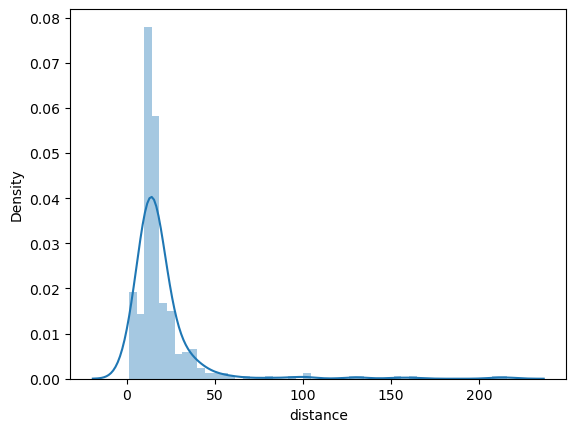

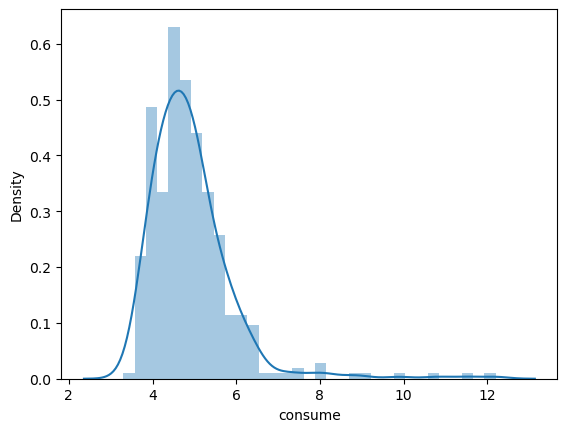

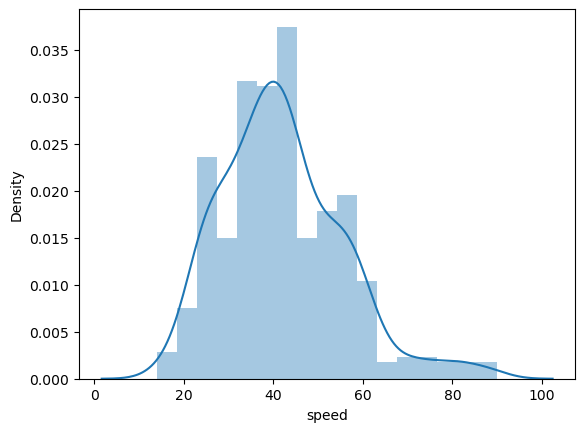

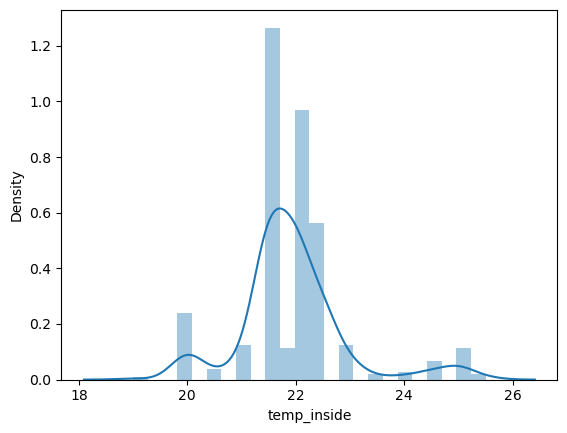

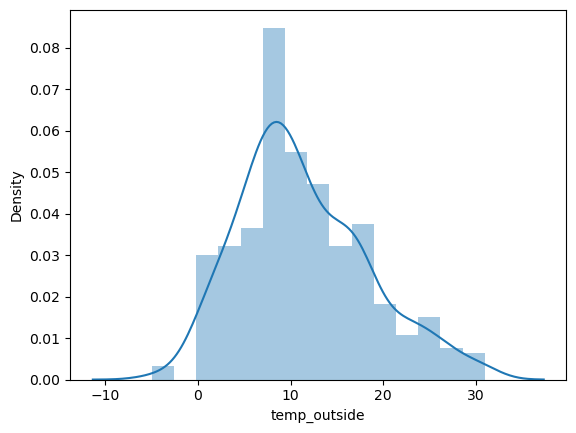

In [22]:
# We can see that distance and consume have quite some outliers - would be nice to know why were there spikes in consume

for col in cols_to_plot:
    sns.distplot(cols_to_plot[col])
    plt.show()
    

Checking multicollinearity

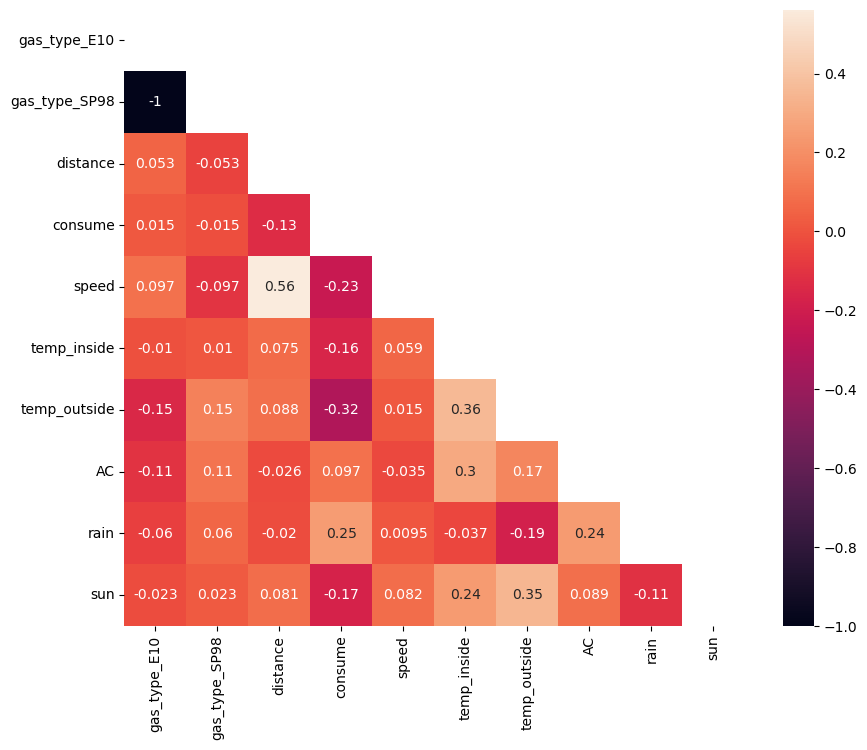

In [23]:
correlations_matrix = data.corr()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

We can see that there is obviously a higher correlation between distance and speed, but not high enough to drop any of those columns. <br>
Trying to remove some outliers

In [24]:
for col in data:
    z_score = np.abs(data[col] - data[col].mean()) / data[col].std()
    data = data[z_score < 3]

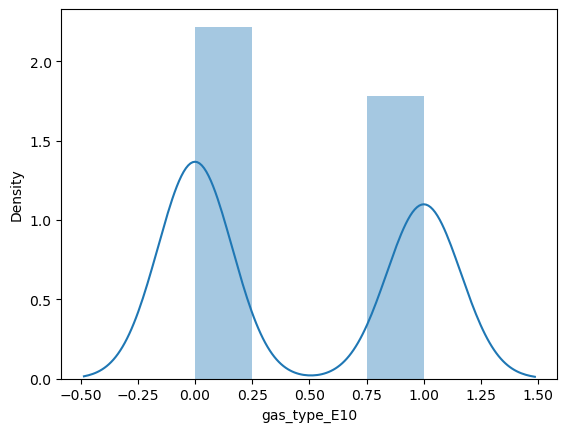

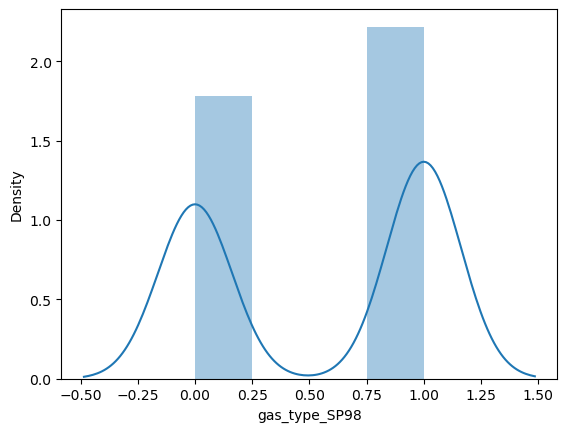

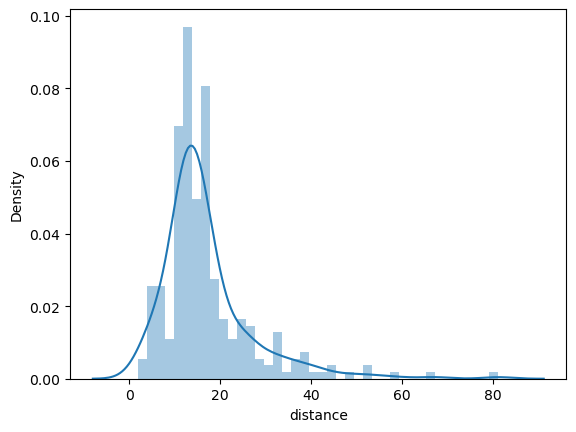

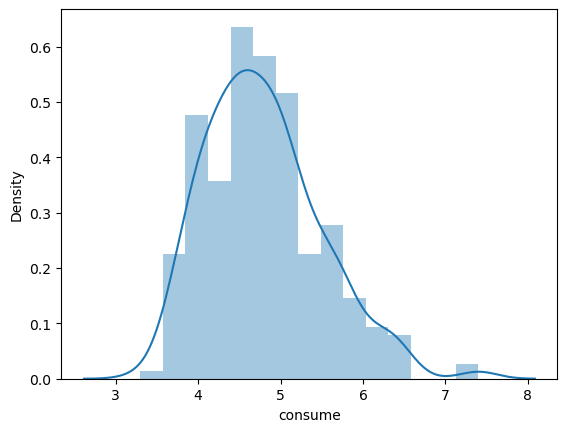

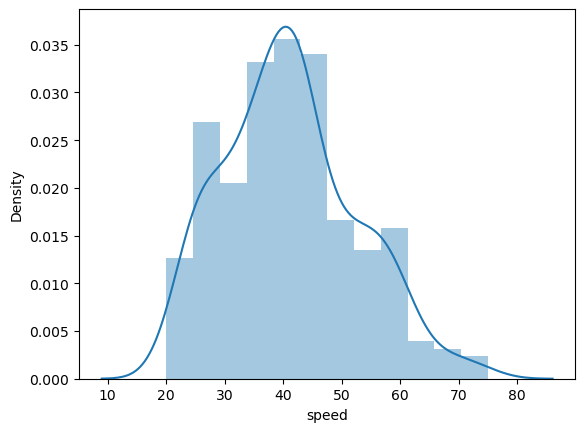

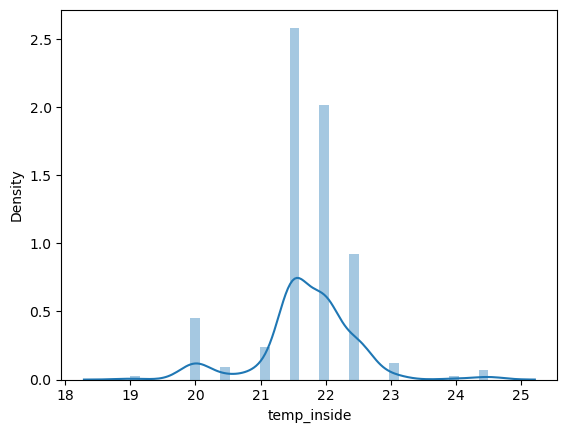

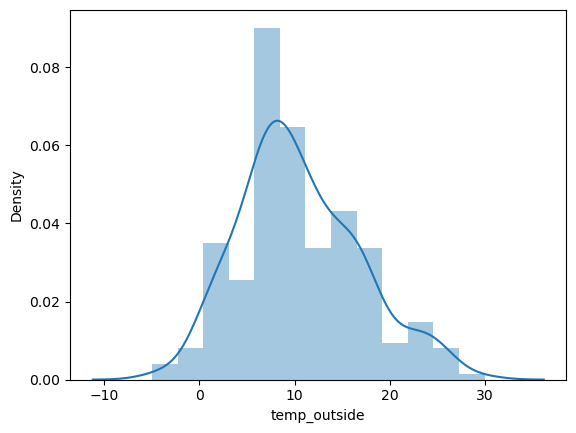

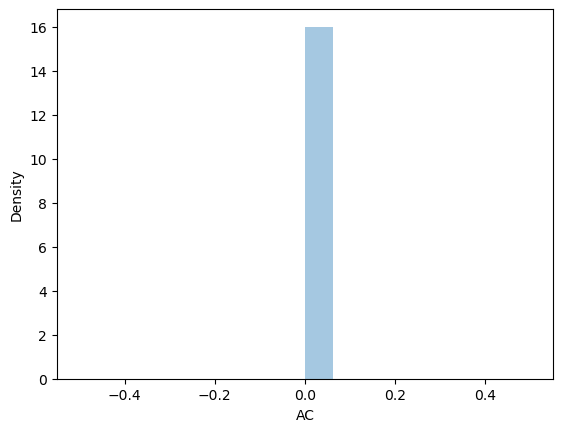

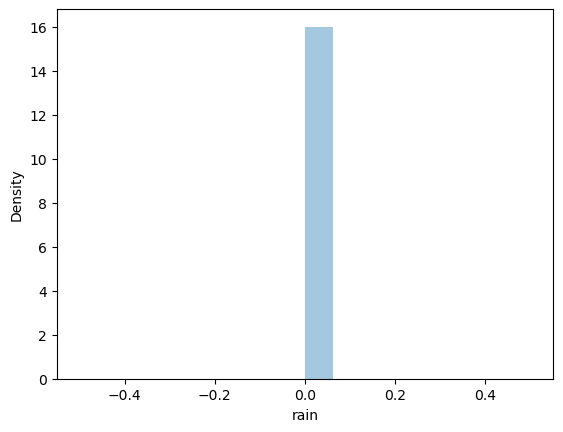

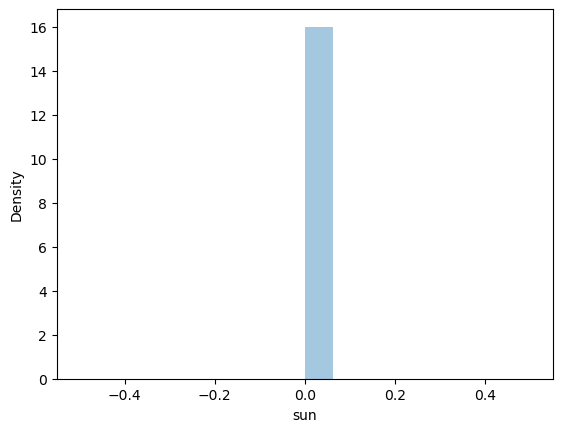

In [25]:
# Checking
# A bit better
for col in data:
    sns.distplot(data[col])
    plt.show()


X-y Split

In [26]:
X = data.drop('gas_type_E10', axis=1)
y = data['gas_type_E10']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler()
transformer.fit(data)

x_standardized = transformer.transform(data)
x_standardized

array([[ 1.11530374, -1.11530374,  1.07697451, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.11530374, -1.11530374, -0.48341771, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.11530374, -1.11530374, -0.56143732, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.89661673,  0.89661673,  1.47682501, ...,  0.        ,
         0.        ,  0.        ],
       [-0.89661673,  0.89661673, -0.8442584 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.89661673,  0.89661673, -0.09331965, ...,  0.        ,
         0.        ,  0.        ]])

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

Predictions and evaluations

In [31]:
predictions = logmodel.predict(X_test)

In [32]:
# Create a classification report for the model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        27

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

[[29  0]
 [ 0 27]]
